<a href="https://colab.research.google.com/github/ArnavGhosh999/CODSOFT---Task-3/blob/main/Credit_Card_Fraud_Dectection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scipy import stats

In [ ]:
df1 = pd.read_csv('/content/fraudTest.csv')
df2 = pd.read_csv('/content/fraudTrain.csv')

In [ ]:
df = pd.concat([df1, df2], ignore_index=True)


In [ ]:
df

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852389,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1852390,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1852391,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1852392,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0


In [ ]:
df.isna()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852389,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1852390,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1852391,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1852392,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.dropna(inplace=True)

In [ ]:
df

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852389,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1852390,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1852391,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1852392,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0


In [ ]:
df[df["is_fraud"] == True]

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
1685,1685,2020-06-21 22:06:39,3560725013359375,fraud_Hamill-D'Amore,health_fitness,24.84,Brooke,Smith,F,63542 Luna Brook Apt. 012,...,31.8599,-102.7413,23,Cytogeneticist,1969-09-15,16bf2e46c54369a8eab2214649506425,1371852399,32.575873,-102.604290,1
1767,1767,2020-06-21 22:32:22,6564459919350820,"fraud_Rodriguez, Yost and Jenkins",misc_net,780.52,Douglas,Willis,M,619 Jeremy Garden Apt. 681,...,42.5545,-90.3508,1306,Public relations officer,1958-09-10,ab4b379d2c0c9c667d46508d4e126d72,1371853942,42.461127,-91.147148,1
1781,1781,2020-06-21 22:37:27,6564459919350820,fraud_Nienow PLC,entertainment,620.33,Douglas,Willis,M,619 Jeremy Garden Apt. 681,...,42.5545,-90.3508,1306,Public relations officer,1958-09-10,47a9987ae81d99f7832a54b29a77bf4b,1371854247,42.771834,-90.158365,1
1784,1784,2020-06-21 22:38:55,4005676619255478,"fraud_Heathcote, Yost and Kertzmann",shopping_net,1077.69,William,Perry,M,458 Phillips Island Apt. 768,...,30.4590,-90.9027,71335,Herbalist,1994-05-31,fe956c7e4a253c437c18918bf96f7b62,1371854335,31.204974,-90.261595,1
1857,1857,2020-06-21 23:02:16,3560725013359375,fraud_Hermann and Sons,shopping_pos,842.65,Brooke,Smith,F,63542 Luna Brook Apt. 012,...,31.8599,-102.7413,23,Cytogeneticist,1969-09-15,f6838c01f5d2262006e6b71d33ba7c6d,1371855736,31.315782,-102.736390,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1851118,1295399,2020-06-21 01:00:08,3524574586339330,fraud_Kassulke PLC,shopping_net,977.01,Ashley,Cabrera,F,94225 Smith Springs Apt. 617,...,27.6330,-80.4031,105638,"Librarian, public",1986-05-07,a83b093f0c1d9068fa0089f7c722615f,1371776408,26.888686,-80.834389,1
1851210,1295491,2020-06-21 01:53:35,3524574586339330,fraud_Schumm PLC,shopping_net,1210.91,Ashley,Cabrera,F,94225 Smith Springs Apt. 617,...,27.6330,-80.4031,105638,"Librarian, public",1986-05-07,f75b35bed13b9e692f170dba45a15b21,1371779615,28.216707,-79.855648,1
1851251,1295532,2020-06-21 02:16:56,4005676619255478,"fraud_Tillman, Dickinson and Labadie",gas_transport,10.24,William,Perry,M,458 Phillips Island Apt. 768,...,30.4590,-90.9027,71335,Herbalist,1994-05-31,a0ba2472cd3fc9731f2a18d3f308f5c3,1371781016,29.700456,-91.361632,1
1851385,1295666,2020-06-21 03:26:20,3560725013359375,fraud_Corwin-Collins,gas_transport,21.69,Brooke,Smith,F,63542 Luna Brook Apt. 012,...,31.8599,-102.7413,23,Cytogeneticist,1969-09-15,daa281350b1e16093c7b4bf97bf4d6ed,1371785180,32.675272,-103.484949,1


In [ ]:
df[df["is_fraud"] == True].sum()

Unnamed: 0                                                      5210085085
trans_date_trans_time    2020-06-21 22:06:392020-06-21 22:32:222020-06-...
cc_num                                                -5096146642712428167
merchant                 fraud_Hamill-D'Amorefraud_Rodriguez, Yost and ...
category                 health_fitnessmisc_netentertainmentshopping_ne...
amt                                                             5121413.29
first                    BrookeDouglasDouglasWilliamBrookeAshleyWilliam...
last                     SmithWillisWillisPerrySmithCabreraPerryPerryPe...
gender                   FMMMFFMMMMMFMFMFFFMFFFMMMMMMMFMMMFMFFFFFFMFFFM...
street                   63542 Luna Brook Apt. 012619 Jeremy Garden Apt...
city                     NotreesBentonBentonDenham SpringsNotreesVero B...
state                    TXWIWILATXFLLALALAWILAFLLAFLLAFLFLFLLAFLFLFLNY...
zip                                                              463244510
lat                      

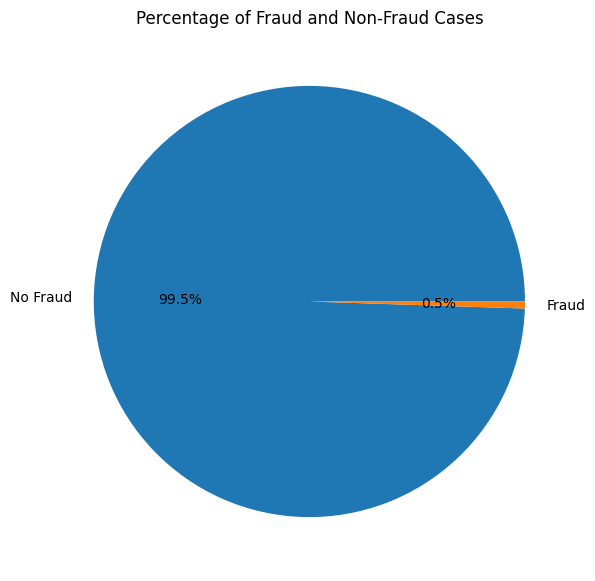

In [ ]:
import matplotlib.pyplot as plt
df_fraud_count = df['is_fraud'].value_counts()
labels = ['No Fraud', 'Fraud']
plt.figure(figsize=(10,7))
plt.pie(df_fraud_count, labels=labels, autopct='%1.1f%%')
plt.title('Percentage of Fraud and Non-Fraud Cases')
plt.show()

##From the graph approx 99% have not been fraud and only 1% have been.

<Axes: >

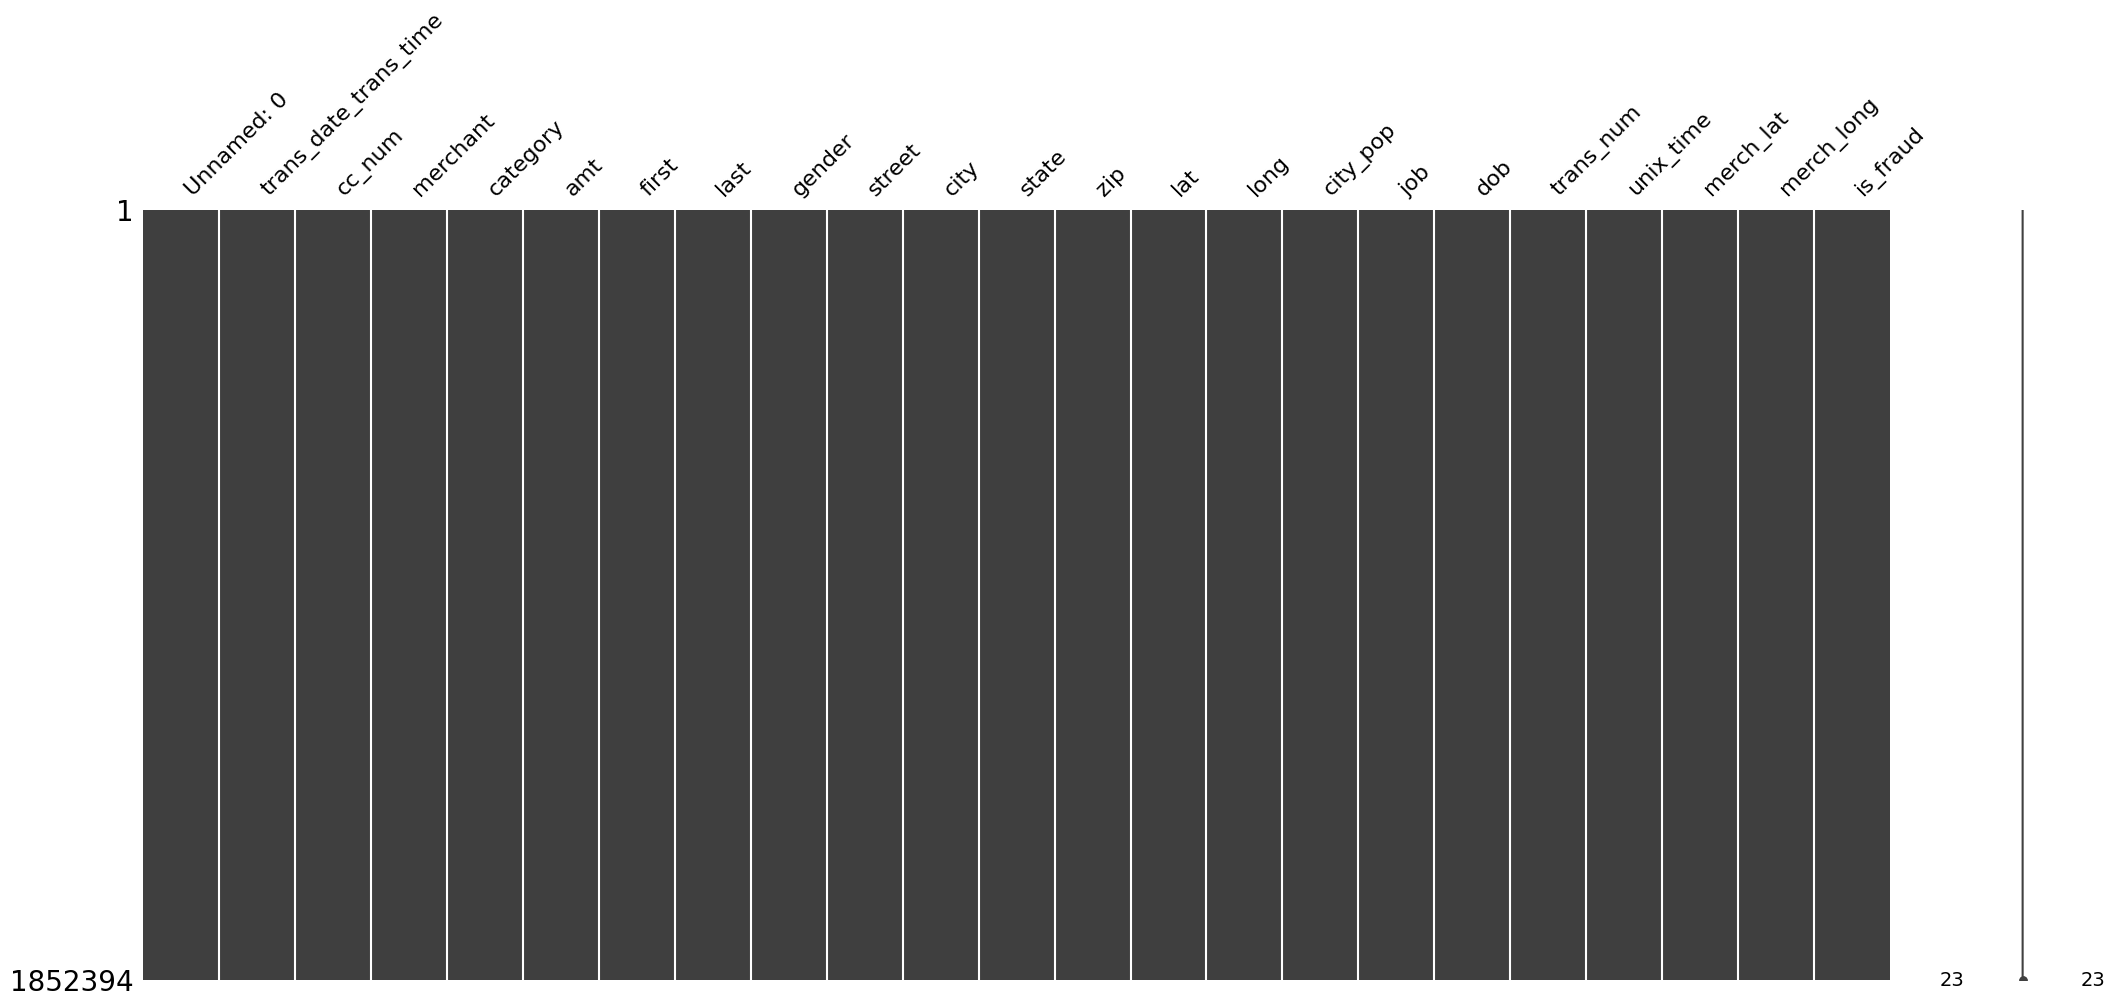

In [ ]:
msno.matrix(df)

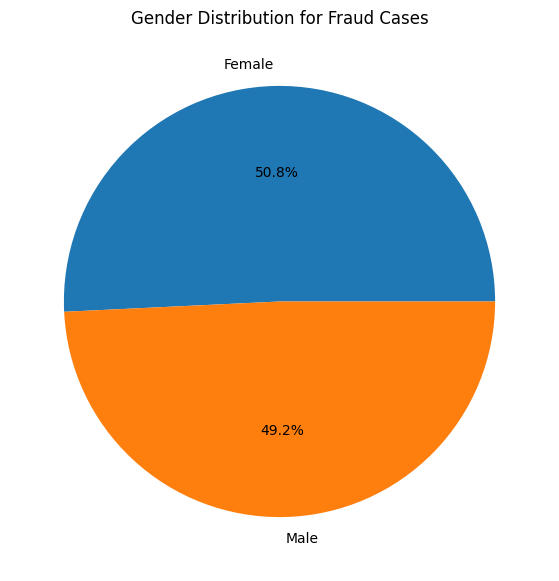

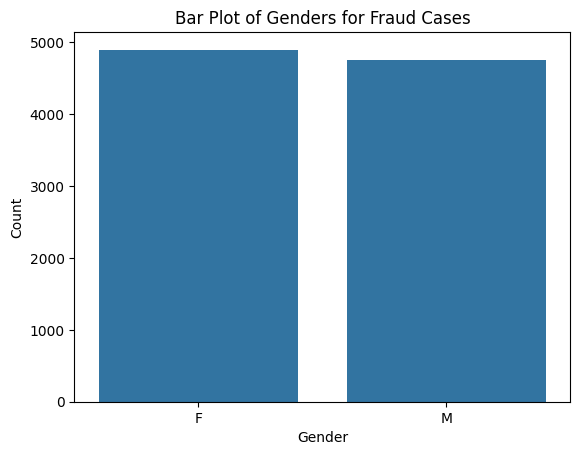

In [ ]:
import matplotlib.pyplot as plt
df_fraud = df[df['is_fraud'] == True]
gender_fraud_count = df_fraud['gender'].value_counts()
labels = ['Female', 'Male']
plt.figure(figsize=(10,7))
plt.pie(gender_fraud_count, labels=labels, autopct='%1.1f%%')
plt.title('Gender Distribution for Fraud Cases')
plt.show()
sns.barplot(x=gender_fraud_count.index, y=gender_fraud_count.values)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Bar Plot of Genders for Fraud Cases')
plt.show()

In [ ]:
df.describe

<bound method NDFrame.describe of          Unnamed: 0 trans_date_trans_time               cc_num  \
0                 0   2020-06-21 12:14:25     2291163933867244   
1                 1   2020-06-21 12:14:33     3573030041201292   
2                 2   2020-06-21 12:14:53     3598215285024754   
3                 3   2020-06-21 12:15:15     3591919803438423   
4                 4   2020-06-21 12:15:17     3526826139003047   
...             ...                   ...                  ...   
1852389     1296670   2020-06-21 12:12:08       30263540414123   
1852390     1296671   2020-06-21 12:12:19     6011149206456997   
1852391     1296672   2020-06-21 12:12:32     3514865930894695   
1852392     1296673   2020-06-21 12:13:36     2720012583106919   
1852393     1296674   2020-06-21 12:13:37  4292902571056973207   

                                     merchant        category     amt  \
0                       fraud_Kirlin and Sons   personal_care    2.86   
1                        fraud_Sporer-Keebler   personal_care   29.84   
2        fraud_Swaniawski, Nitzsche and Welch  health_fitness   41.28   
3                           fraud_Haley Group        misc_pos   60.05   
4                       fraud_Johnston-Casper          travel    3.19   
...                                       ...             ...     ...   
1852389                     fraud_Reichel Inc   entertainment   15.56   
1852390              fraud_Abernathy and Sons     food_dining   51.70   
1852391                  fraud_Stiedemann Ltd     food_dining  105.93   
1852392   fraud_Reinger, Weissnat and Strosin     food_dining   74.90   
1852393   fraud_Langosh, Wintheiser and Hyatt     food_dining    4.30   

               first       last gender                         street  ...  \
0               Jeff    Elliott      M              351 Darlene Green  ...   
1             Joanne   Williams      F               3638 Marsh Union  ...   
2             Ashley      Lopez      F           9333 Valentine Point  ...   
3              Brian   Williams      M    32941 Krystal Mill Apt. 552  ...   
4             Nathan     Massey      M       5783 Evan Roads Apt. 465  ...   
...              ...        ...    ...                            ...  ...   
1852389         Erik  Patterson      M       162 Jessica Row Apt. 072  ...   
1852390      Jeffrey      White      M  8617 Holmes Terrace Suite 651  ...   
1852391  Christopher  Castaneda      M     1632 Cohen Drive Suite 639  ...   
1852392       Joseph     Murray      M           42933 Ryan Underpass  ...   
1852393      Jeffrey      Smith      M           135 Joseph Mountains  ...   

             lat      long  city_pop                               job  \
0        33.9659  -80.9355    333497               Mechanical engineer   
1        40.3207 -110.4360       302            Sales professional, IT   
2        40.6729  -73.5365     34496                 Librarian, public   
3        28.5697  -80.8191     54767                      Set designer   
4        44.2529  -85.0170      1126                Furniture designer   
...          ...       ...       ...                               ...   
1852389  37.7175 -112.4777       258                      Geoscientist   
1852390  39.2667  -77.5101       100  Production assistant, television   
1852391  32.9396 -105.8189       899                   Naval architect   
1852392  43.3526 -102.5411      1126             Volunteer coordinator   
1852393  45.8433 -113.8748       218          Therapist, horticultural   

                dob                         trans_num   unix_time  merch_lat  \
0        1968-03-19  2da90c7d74bd46a0caf3777415b3ebd3  1371816865  33.986391   
1        1990-01-17  324cc204407e99f51b0d6ca0055005e7  1371816873  39.450498   
2        1970-10-21  c81755dbbbea9d5c77f094348a7579be  1371816893  40.495810   
3        1987-07-25  2159175b9efe66dc301f149d3d5abf8c  1371816915  28.812398   
4        1955-07-06  57ff021bd3f328f8738bb535c302a31b  1371816917  44.

In [ ]:
df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06
mean,5.371934e+05,4.173860e+17,7.006357e+01,4.881326e+04,3.853931e+01,-9.022783e+01,8.864367e+04,1.358674e+09,3.853898e+01,-9.022794e+01,5.210015e-03
std,3.669110e+05,1.309115e+18,1.592540e+02,2.688185e+04,5.071470e+00,1.374789e+01,3.014876e+05,1.819508e+07,5.105604e+00,1.375969e+01,7.199217e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902742e+01,-1.666716e+02,0.000000e+00
25%,2.315490e+05,1.800429e+14,9.640000e+00,2.623700e+04,3.466890e+01,-9.679800e+01,7.410000e+02,1.343017e+09,3.474012e+01,-9.689944e+01,0.000000e+00
50%,4.630980e+05,3.521417e+15,4.745000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.443000e+03,1.357089e+09,3.936890e+01,-8.744069e+01,0.000000e+00
75%,8.335758e+05,4.642255e+15,8.310000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.374581e+09,4.195626e+01,-8.024511e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.992100e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.388534e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   trans_date_trans_time  object 
 2   cc_num                 int64  
 3   merchant               object 
 4   category               object 
 5   amt                    float64
 6   first                  object 
 7   last                   object 
 8   gender                 object 
 9   street                 object 
 10  city                   object 
 11  state                  object 
 12  zip                    int64  
 13  lat                    float64
 14  long                   float64
 15  city_pop               int64  
 16  job                    object 
 17  dob                    object 
 18  trans_num              object 
 19  unix_time              int64  
 20  merch_lat              float64
 21  merch_long             float64
 22  is_fraud          

In [ ]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud', 'high_amount'],
      dtype='object')

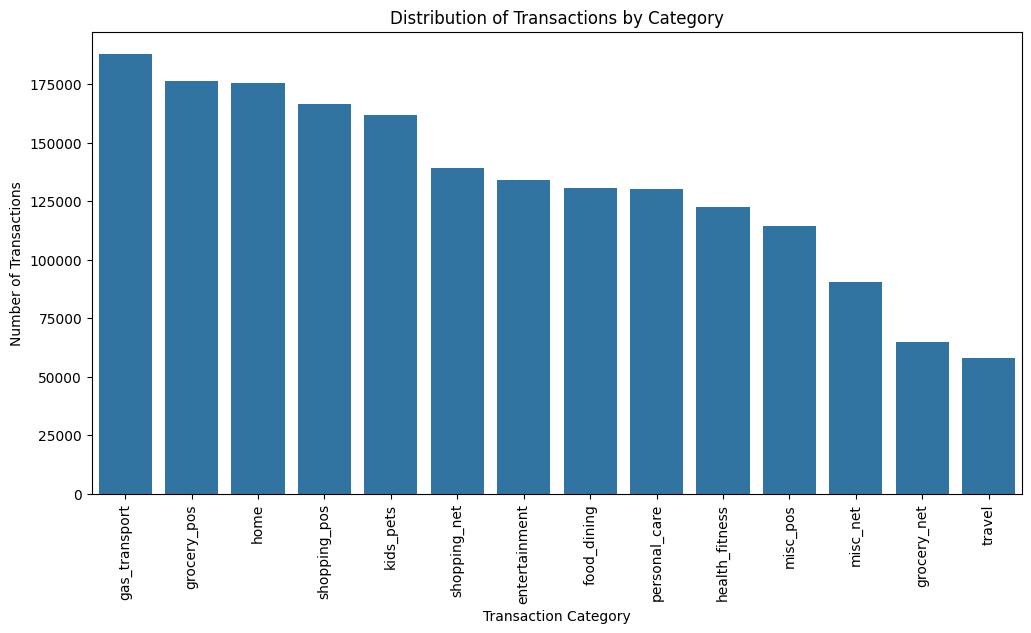

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='category', data=df, order=df['category'].value_counts().index)
plt.xlabel('Transaction Category')
plt.ylabel('Number of Transactions')
plt.title('Distribution of Transactions by Category')
plt.xticks(rotation=90)
plt.show()

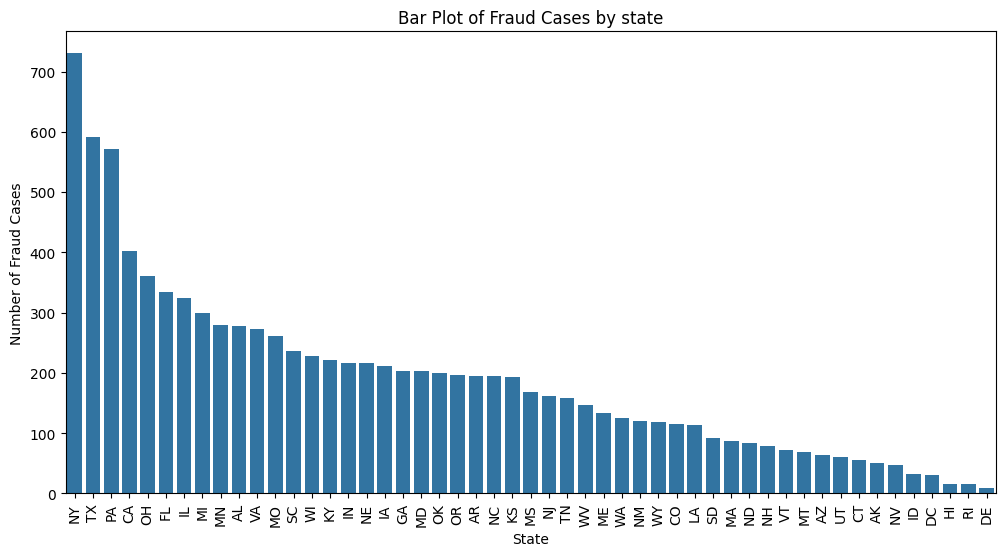

In [ ]:
import matplotlib.pyplot as plt
city_fraud_count = df_fraud['state'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=city_fraud_count.index, y=city_fraud_count.values)
plt.xlabel('State')
plt.ylabel('Number of Fraud Cases')
plt.title('Bar Plot of Fraud Cases by state')
plt.xticks(rotation=90)
plt.show()

### - New York is the state with the highest number of credit card fraud cases.

In [ ]:
df_processed = df.drop(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'first', 'last', 'street', 'city', 'state', 'zip', 'job', 'dob', 'trans_num'], axis=1)
df_processed = pd.get_dummies(df_processed, columns=['gender'])
X = df_processed.drop('is_fraud', axis=1)
y = df_processed['is_fraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
logistic_reg_model = LogisticRegression()
logistic_reg_model.fit(X_train, y_train)
logistic_reg_predictions = logistic_reg_model.predict(X_test)
logistic_reg_accuracy = accuracy_score(y_test, logistic_reg_predictions)
print("Logistic Regression Accuracy:", logistic_reg_accuracy*100)
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)
linear_reg_predictions = linear_reg_model.predict(X_test)
linear_reg_mse = mean_squared_error(y_test, linear_reg_predictions)
print("Linear Regression Mean Squared Error:", linear_reg_mse*100)


Logistic Regression Accuracy: 99.48796018127884
Linear Regression Mean Squared Error: 0.48961440631639114


In [ ]:
#IDENTIFYIN OUTLIERS (since the accuracy is too high)
df_processed = df.drop(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'first', 'last', 'street', 'city', 'state', 'zip', 'job', 'dob', 'trans_num'], axis=1)
df_processed = pd.get_dummies(df_processed, columns=['gender'])
X = df_processed.drop('is_fraud', axis=1)
y = df_processed['is_fraud']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
from scipy import stats
z_threshold = 3
z_scores = stats.zscore(X_train)
outliers_indices = (abs(z_scores) > z_threshold).any(axis=1)
X_train_cleaned = X_train[~outliers_indices]
y_train_cleaned = y_train[~outliers_indices]
logistic_reg_model = LogisticRegression()
logistic_reg_model.fit(X_train_cleaned, y_train_cleaned)
logistic_reg_predictions = logistic_reg_model.predict(X_test)
logistic_reg_accuracy = accuracy_score(y_test, logistic_reg_predictions)
print("Logistic Regression Accuracy after removing outliers:", logistic_reg_accuracy*100)


Logistic Regression Accuracy after removing outliers: 99.31683037365141


In [ ]:
df_processed = df.drop(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'first', 'last', 'street', 'city', 'state', 'zip', 'job', 'dob', 'trans_num'], axis=1)
df_processed = pd.get_dummies(df_processed, columns=['gender'])
y = df_processed['is_fraud']
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
# Identify and Remove Outliers
# Z-score threshold for identifying outliers
z_threshold = 3
z_scores = stats.zscore(X_train)
# Find outliers indices where Z-score is greater than the threshold
outliers_indices = (abs(z_scores) > z_threshold).any(axis=1)
# Remove outliers from the training set
X_train_cleaned = X_train[~outliers_indices]
y_train_cleaned = y_train[~outliers_indices]
gradient_boosting_model = GradientBoostingClassifier()
gradient_boosting_model.fit(X_train_cleaned, y_train_cleaned)
gradient_boosting_predictions = gradient_boosting_model.predict(X_test)
accuracy = accuracy_score(y_test, gradient_boosting_predictions)
print("Gradient Boosting Accuracy after removing outliers:", accuracy)
precision = precision_score(y_test, gradient_boosting_predictions)
print("Gradient Boosting Precision after removing outliers:", precision)
recall = recall_score(y_test, gradient_boosting_predictions)
print("Gradient Boosting Recall after removing outliers:", recall)
f1 = f1_score(y_test, gradient_boosting_predictions)
print("Gradient Boosting F1 Score after removing outliers:", f1)
#DECISION TREE
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train_cleaned, y_train_cleaned)
decision_tree_predictions = decision_tree_model.predict(X_test)
accuracy = accuracy_score(y_test, decision_tree_predictions)
print("Decision Tree Accuracy after removing outliers:", accuracy)
precision = precision_score(y_test, decision_tree_predictions)
print("Decision Tree Precision after removing outliers:", precision)
recall = recall_score(y_test, decision_tree_predictions)
print("Decision Tree Recall after removing outliers:", recall)
f1 = f1_score(y_test, decision_tree_predictions)
print("Decision Tree F1 Score after removing outliers:", f1)

Gradient Boosting Accuracy after removing outliers: 0.9947230477301008
Gradient Boosting Precision after removing outliers: 0.17045454545454544
Gradient Boosting Recall after removing outliers: 0.00790722192936215
Gradient Boosting F1 Score after removing outliers: 0.015113350125944582
Decision Tree Accuracy after removing outliers: 0.9925258921558306
Decision Tree Precision after removing outliers: 0.2120211360634082
Decision Tree Recall after removing outliers: 0.16921454928835003
Decision Tree F1 Score after removing outliers: 0.1882145998240985


In [ ]:
df_processed = df.drop(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'first', 'last', 'street', 'city', 'state', 'zip', 'job', 'dob', 'trans_num'], axis=1)
df_processed = pd.get_dummies(df_processed, columns=['gender'])
X = df_processed.drop('is_fraud', axis=1)
y = df_processed['is_fraud']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
z_threshold = 3
z_scores = stats.zscore(X_train)
outliers_indices = (abs(z_scores) > z_threshold).any(axis=1)
X_train_cleaned = X_train[~outliers_indices]
y_train_cleaned = y_train[~outliers_indices]
gradient_boosting_model = GradientBoostingClassifier()
gradient_boosting_model.fit(X_train_cleaned, y_train_cleaned)
gradient_boosting_predictions = gradient_boosting_model.predict(X_test)
accuracy = accuracy_score(y_test, gradient_boosting_predictions)
print("Gradient Boosting Accuracy after removing outliers:", accuracy)
precision = precision_score(y_test, gradient_boosting_predictions)
print("Gradient Boosting Precision after removing outliers:", precision)
recall = recall_score(y_test, gradient_boosting_predictions)
print("Gradient Boosting Recall after removing outliers:", recall)
f1 = f1_score(y_test, gradient_boosting_predictions)
print("Gradient Boosting F1 Score after removing outliers:", f1)
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train_cleaned, y_train_cleaned)
decision_tree_predictions = decision_tree_model.predict(X_test)
accuracy = accuracy_score(y_test, decision_tree_predictions)
print("Decision Tree Accuracy after removing outliers:", accuracy)
precision = precision_score(y_test, decision_tree_predictions)
print("Decision Tree Precision after removing outliers:", precision)
recall = recall_score(y_test, decision_tree_predictions)
print("Decision Tree Recall after removing outliers:", recall)
f1 = f1_score(y_test, decision_tree_predictions)
print("Decision Tree F1 Score after removing outliers:", f1)

Gradient Boosting Accuracy after removing outliers: 0.9947230477301008
Gradient Boosting Precision after removing outliers: 0.17045454545454544
Gradient Boosting Recall after removing outliers: 0.00790722192936215
Gradient Boosting F1 Score after removing outliers: 0.015113350125944582
Decision Tree Accuracy after removing outliers: 0.9925960715722079
Decision Tree Precision after removing outliers: 0.21224489795918366
Decision Tree Recall after removing outliers: 0.16447021613073273
Decision Tree F1 Score after removing outliers: 0.18532818532818532


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
df_processed = df.drop(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'first', 'last', 'street', 'city', 'state', 'zip', 'job', 'dob', 'trans_num'], axis=1)
df_processed = pd.get_dummies(df_processed, columns=['gender'])
X = df_processed.drop('is_fraud', axis=1)
y = df_processed['is_fraud']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
gradient_boosting_model = GradientBoostingClassifier()
gradient_boosting_model.fit(X_train_resampled, y_train_resampled)
y_pred = gradient_boosting_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Metrics after applying SMOTE:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Metrics after applying SMOTE:
Accuracy: 0.9042563816032757
Precision: 0.04449991859770988
Recall: 0.8645229309435951
F1 Score: 0.08464297695543341
